In [1]:
# installing a package.

# !pip install catboost

In [2]:
# installing streamlit for deploying our model.

# !pip install streamlit

In [3]:
# importing libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pickle

In [4]:
# importing the dataset.

data = pd.read_csv('C:\\Users\\DC\\Downloads\\diabetes.csv')
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
# obtaining descriptive statistics.

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# checking data information.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# There are no missing values. 
# But the descriptive statistics show the presence of zeros as well as possible outliers in the dataset. 
# Hence, the need to assess each column individually.

In [8]:
# Pregnancies.

data['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [9]:
# the distribution/number of people based on frequency/number of pregnancies.
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [10]:
# the number of people with and without diabetis in each pregnancy frequency.
data.groupby(['Pregnancies', 'Outcome'])['Outcome'].count()

Pregnancies  Outcome
0            0           73
             1           38
1            0          106
             1           29
2            0           84
             1           19
3            0           48
             1           27
4            0           45
             1           23
5            0           36
             1           21
6            0           34
             1           16
7            0           20
             1           25
8            0           16
             1           22
9            0           10
             1           18
10           0           14
             1           10
11           0            4
             1            7
12           0            5
             1            4
13           0            5
             1            5
14           1            2
15           1            1
17           1            1
Name: Outcome, dtype: int64

In [11]:
# Glucose

data['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [12]:
# BloodPressure

data['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
data['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [15]:
data['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [16]:
data['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [17]:
data['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [18]:
data['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [19]:
# Checking the number of patients by age.

data['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [20]:
# checking the number of diabetic and non-diabeetic patients in each age.
# the result show that majority of the diabetic patients are women bewteen 40 and 59 years of age.
# This is because there are more/higher number of recorded diabetis incidence within this age bracket.

# ensuring that the entire rows are outputted. Preventing output truncation.
pd.options.display.max_rows = None
data.groupby(['Age', 'Outcome'])['Outcome'].count()

Age  Outcome
21   0          58
     1           5
22   0          61
     1          11
23   0          31
     1           7
24   0          38
     1           8
25   0          34
     1          14
26   0          25
     1           8
27   0          24
     1           8
28   0          25
     1          10
29   0          16
     1          13
30   0          15
     1           6
31   0          11
     1          13
32   0           7
     1           9
33   0           7
     1          10
34   0          10
     1           4
35   0           5
     1           5
36   0           6
     1          10
37   0          13
     1           6
38   0           6
     1          10
39   0           9
     1           3
40   0           7
     1           6
41   0           9
     1          13
42   0          11
     1           7
43   0           2
     1          11
44   0           3
     1           5
45   0           7
     1           8
46   0           6
     1           7

In [21]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [22]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [23]:
# length of the column or total number of entries in the column/feature

len(data['Outcome'])

768

In [24]:
# Checking the % distribution of ladies with and without diabetes in the given data.

total = len(data['Outcome'])

p = data['Outcome'].value_counts() / total
p

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [25]:
### Correlation

<Axes: >

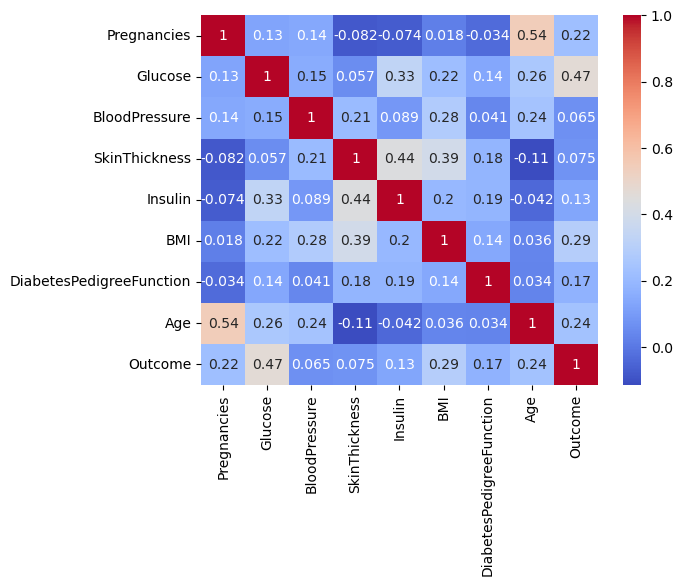

In [26]:
# instantiating correlation
cor = data.corr()

# plotting the correlation heatmap.
sns.heatmap(cor, annot=True, cmap='coolwarm')


# the result shows that there is no need to be worried bout multicollinearity since the features are not 
# highly correlated with each other.

In [27]:
# checking the correlation of each feature with the target.
# It shows that Glucose is the highest correlated with the target, then BMI, Age, and Pregnancy.
# they are moderately and lowly correlated. there's none with an excessively high correlation with the target, so there's no
# need to be worrie about serial correlation.

cor['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [28]:
# Splitting the data into dependent and independent variables
# That is, features and target.

X = data.drop(['Outcome'], axis=1)
Y = data['Outcome']

# checking for their shapes
X.shape, Y.shape

((768, 8), (768,))

In [29]:
# Model Training

In [30]:
# Importing libraries.

# for splitting and validation.
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# for training.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
#import XGBoost as xgb

# for evaluation.
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, roc_auc_score, f1_score, get_scorer_names

# for feature selection.
from sklearn.feature_selection import RFE, RFECV

In [31]:
# splitting the data into train and test sets.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=11)

# shape of the splitted dataset.
print ('shape of the training data:', x_train.shape, y_train.shape)
print('')
print ('shape of the test data:', x_test.shape, y_test.shape)

shape of the training data: (576, 8) (576,)

shape of the test data: (192, 8) (192,)


In [32]:
# Model 1
# Logistic Regression

In [33]:
# training the model.
log = LogisticRegression()
log.fit(x_train, y_train)

C:\Users\DC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
# checking for available scoring metrics for cross validation.

scoring = get_scorer_names()
scoring

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [35]:
# using cross validation to ensure there is no overfitting.

score = cross_val_score(log, x_train, y_train, cv=5, scoring='roc_auc')
print ('The scores for each iteration are:', score)
print('')
print ('The average roc_auc score is {:.2f}' .format(score.mean()))

C:\Users\DC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The scores for each iteration are: [0.8396748  0.78707976 0.75933333 0.84833333 0.87066667]

The average roc_auc score is 0.82


C:\Users\DC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [36]:
# predicting with the model.
y_pred = log.predict(x_test)

In [37]:
# evaluating the model
con_mat = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prc = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

In [38]:
print('Accuracy:{:.2f}' .format(acc))
print('Precision:{:.2f}' .format(prc))
print('')
print('F1:{:.2f}' .format(f1))
print('ROC:{:.2f}' .format(roc))
con_mat

Accuracy:0.78
Precision:0.79

F1:0.61
ROC:0.71


array([[117,   9],
       [ 33,  33]], dtype=int64)

In [39]:
# Model 2
# Random Forest

In [40]:
# instantiating the classifier.
forest = RandomForestClassifier(random_state=11)

# training the model
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=11)

In [41]:
# cross validating with Random Forest.

score = cross_val_score(forest, x_train, y_train, scoring='roc_auc')
print (score)
print ('')
print ('avg score: {:.2f}' .format(score.mean()))

[0.83788618 0.76137113 0.7525     0.8175     0.8275    ]

avg score: 0.80


In [42]:
# making prediction.

y_pred = forest.predict(x_test)

In [43]:
# evaluating the model.

con_mat = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prc = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

In [44]:
print('Accuracy:{:.2f}' .format(acc))
print('Precision:{:.2f}' .format(prc))
print('')
print('F1:{:.2f}' .format(f1))
print('ROC:{:.2f}' .format(roc))
con_mat

Accuracy:0.77
Precision:0.72

F1:0.60
ROC:0.71


array([[113,  13],
       [ 32,  34]], dtype=int64)

In [45]:
# creating a function to train, predict and evaluate models.

def train_pred_eval(model):
    # training
    model.fit(x_train, y_train)
    
    # predict
    y_pred = model.predict(x_test)
    
    # evaluate
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    con_mat = confusion_matrix(y_test, y_pred)
    
    print ('f1 score: {:.2f}' .format(f1))
    print ('roc: {:.2f}' .format(roc))
    print ('')
    print (con_mat)

In [46]:
# Model 3
# Support Vector Classifier

In [47]:
# instantiating svc
# press shift + tab on your keyboard to display inspect the object by displaying its parameters 
# while your cursor is in the bracket.

svc = SVC(kernel='linear', C=1.0, random_state=11)

In [48]:
# cross validating the svc model.

score = cross_val_score(svc, x_test, y_test, scoring='roc_auc')
print (score)
print ('')
print ('avg score: {:.2f}' .format(score.mean()))

[0.80177515 0.69142857 0.70769231 0.90153846 0.79384615]

avg score: 0.78


In [49]:
# training, predicting and evaluating the svc model.

train_pred_eval(svc)

f1 score: 0.57
roc: 0.69

[[114  12]
 [ 35  31]]


In [50]:
# Model 4
# AdaBoost

In [51]:
# instantiating adaboost

ada = AdaBoostClassifier(n_estimators=100, algorithm='SAMME.R', learning_rate=1.0, random_state=11)

In [52]:
# cross validating with adaboost.

score = cross_val_score(ada, x_train, y_train, scoring='roc_auc')
print (score)
print ('')
print ('avg score: {:.2f}' .format(score.mean()))

[0.76520325 0.68473962 0.76566667 0.829      0.826     ]

avg score: 0.77


In [53]:
# train, test, and evaluating the adaboost model.

train_pred_eval(ada)

f1 score: 0.61
roc: 0.71

[[112  14]
 [ 31  35]]


In [54]:
# Model 5
# CatBoost

In [55]:
# instantiating catboost

cat = CatBoostClassifier(random_seed=11, bootstrap_type='Bernoulli',  
                              iterations=1000, silent=True, eval_metric='AUC')

In [56]:
# cross validating with catboost.

score = cross_val_score(cat, x_train, y_train, scoring='roc_auc')
print (score)
print ('')
print ('avg score: {:.2f}' .format(score.mean()))

[0.84552846 0.77125906 0.791      0.82533333 0.84166667]

avg score: 0.81


In [57]:
# train, test, and evaluating the catboost model.

train_pred_eval(cat)

f1 score: 0.58
roc: 0.69

[[113  13]
 [ 34  32]]


In [58]:
# Feature importance from Random forest.
feat_importance = forest.feature_importances_

feat_table = pd.DataFrame({'features': x_train.columns, 'feature_importance': feat_importance})
feat_table

,features,feature_importance
0,Pregnancies,0.084441
1,Glucose,0.265336
2,BloodPressure,0.088221
3,SkinThickness,0.072496
4,Insulin,0.068361
5,BMI,0.163124
6,DiabetesPedigreeFunction,0.129016
7,Age,0.129005


In [59]:
# The output below shows the most important features in the model from the highest to the lowest (according to Random Forest) 
feat_table.sort_values(by='feature_importance', ascending=False)

,features,feature_importance
1,Glucose,0.265336
5,BMI,0.163124
6,DiabetesPedigreeFunction,0.129016
7,Age,0.129005
2,BloodPressure,0.088221
0,Pregnancies,0.084441
3,SkinThickness,0.072496
4,Insulin,0.068361


In [60]:
# Since the best performing model is the Logistic Regression, we will use the Logistic Regression model 
# to build our Diabetes Checker application.

In [61]:
# serializing the model. That is, saving the model as a file that will be passed into/used to build an API.

filename = 'log_model.sav'
pickle.dump(log, open(filename, 'wb'))

In [62]:
# Building a new model using Glucose, BMI, Age, Blood pressure, Insulin, and Pregnancies based on 
# their feature importance and user accessibility.

In [70]:
new_data = data[['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin', 'Pregnancies', 'Outcome']]
new_data.head(3)

,Glucose,BMI,Age,BloodPressure,Insulin,Pregnancies,Outcome
0,148,33.6,50,72,0,6,1
1,85,26.6,31,66,0,1,0
2,183,23.3,32,64,0,8,1


In [71]:
new_data.shape

(768, 7)

In [77]:
# split into features and target.

X_new = new_data.drop(['Outcome'], axis=1)
Y_new = new_data['Outcome']

X_new.shape, Y_new.shape

((768, 6), (768,))

In [78]:
# split into train and test sets.

x_train, x_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.25, random_state=11)

In [79]:
# Using our Logistic regression model which was the best performer,
# Note that it is exactly the same model since the hyper-parameters are the same. The change in name -log2 instead of log,
# is to help differentiate both models when seirializing (that is saving the model using pickle).

# training.
log2 = LogisticRegression()
log2.fit(x_train, y_train)

# testing/predicting.
y_pred = log2.predict(x_test)

# evaluating model performance.
F1 = f1_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred)
con_mat = confusion_matrix(y_test, y_pred)

# printing the evaluation results.
print ('F1: {:.2f}' .format(F1))
print ('AUC: {:.2f}' .format(AUC))
print ('')
print (con_mat)

F1: 0.55
AUC: 0.68

[[115  11]
 [ 37  29]]


In [80]:
score2 = cross_val_score(log2, x_train, y_train, cv=5, scoring='roc_auc')
print (score2)
print ('avg score: {:.2f}' .format(score2.mean()))

[0.8295935  0.77125906 0.79633333 0.85266667 0.86766667]
avg score: 0.82


In [81]:
# Using our Random forest,

# training.
forest2 = RandomForestClassifier(random_state=11)
forest2.fit(x_train, y_train)

# testing/predicting.
y_pred = forest2.predict(x_test)

# evaluating model performance.
F1 = f1_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred)
con_mat = confusion_matrix(y_test, y_pred)

# printing the evaluation results.
print ('F1: {:.2f}' .format(F1))
print ('AUC: {:.2f}' .format(AUC))
print ('')
print (con_mat)

F1: 0.55
AUC: 0.67

[[110  16]
 [ 35  31]]


In [82]:
score2 = cross_val_score(forest2, x_train, y_train, cv=5, scoring='roc_auc')
print (score2)
print ('avg score: {:.2f}' .format(score2.mean()))

[0.8201626  0.74703362 0.773      0.8315     0.8525    ]
avg score: 0.80


In [83]:
# Reducing the features made the model worse-off, but we need to trade-off between usability and model performance.
# Making the model more user friendly using input features that are easily accessible by the user leads to some performance reduction.
# but we will go ahead and use the new model and observe how it performs while we gather more data to improve it.

In [84]:
# Serializing the new model,

filename = 'log2_model.pkl'
pickle.dump(log2, open(filename, 'wb'))